# Twitter-Bitcoin Correlation Analysis

## 1. Correlation with Sentimental Data & Price of Bitcoin

- Bitcoin 가격과 김도영 학우가 만든 전처리기, 감성분석기를 이용해 상관관계를 확인하기 전 데이터에 대한 분석을 진행하였습니다. 

### 1.1 필요한 라이브러리 import

In [1]:
# nltk 활용을 위한 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimjuwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
from sentimentalAnalysis import sentimental_analysis
import matplotlib.pyplot as plt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from coincrawler import coin_crawl_his
from data_pipeline import coin_data_pipeline
from data_concat import data_concat
from Greed_Fear_Model import Greed_Fear_Model
import statsmodels.api as sm 
import numpy as np

### 1.2 필요한 데이터 로드 

- Bitcoin_tweet.csv 파일을 로드하고 해당 어트리뷰트는 무엇인지 데이터 수 등 파악
- 'text'라는 컬럼부분을 'tweet'으로 바꿈 
- 데이터를 파악하여 칼럼 값에 결측치가 있는 것을 확인하였음. 결측치가 있을 경우 학습이 안될 가능성이 높고, compile이 되지 않을 가능성이 높으므로 해당값을 제거해주는 방식으로 코딩을 진행하였음

## POLYGON 데이터 모델링 ( Target  : 'target_close')

In [3]:
train_data = pd.read_csv('twitter_dataset.csv').drop('Unnamed: 0',axis=1)
train_data

,close,count,flair_avg,flair_sum,follower_number_avg,follower_number_sum,following_number_avg,following_number_sum,high,likes_avg,...,target_market cap,target_open,target_vol,textblob_avg,textblob_sum,tweet_length,vader_avg,vader_sum,vol,date
0,-0.834088,-1.162789,-1.056379,-0.376469,-1.072859,-1.072859,1.227984,-1.060005,-0.927379,-0.137619,...,-0.779133,-0.834254,1.662144,-1.601728,-1.138748,-1.182562,-1.535078,-1.119193,1.033283,2021-02-05
1,-0.711882,-1.068993,-1.235151,-0.545274,-1.015768,-1.015768,-0.314583,-1.018168,-0.649014,-0.338438,...,-0.818141,-0.713469,1.357839,-1.158831,-1.069072,-1.122227,-1.415935,-1.068959,1.734918,2021-02-06
2,-0.751383,-1.083678,-0.535172,-0.391719,-1.045025,-1.045025,-0.100330,-1.021493,-0.779103,-0.147790,...,-0.028745,-0.752944,3.236651,0.142859,-1.037176,-1.127292,-1.392941,-1.075469,1.413791,2021-02-07
3,0.043167,-0.928713,-0.736080,-0.597182,-0.812995,-0.812995,-0.328227,-0.904136,-0.079952,0.256561,...,0.002283,0.039924,2.732172,-1.227601,-0.980785,-1.033034,-1.117558,-0.975328,3.396462,2021-02-08
4,0.074177,-1.005514,-0.710590,-0.507052,-0.917393,-0.917393,-0.082401,-0.952532,0.111223,0.417199,...,-0.166597,0.070861,2.496644,-1.380534,-1.037433,-1.078297,-1.222505,-1.025534,2.864096,2021-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.541904,1.894998,0.335520,-0.157058,1.384053,1.384053,0.067868,1.687080,-0.634168,0.533864,...,-0.441939,-0.542038,-0.741982,0.667252,1.909231,1.813030,0.217156,1.598256,-0.338946,2022-04-18
138,-0.468197,1.993235,0.698866,1.070373,1.490971,1.490971,-0.206844,1.573259,-0.561233,-0.093481,...,-0.455878,-0.468862,-0.610535,1.432367,2.449276,2.012100,0.723046,2.056435,-0.802109,2022-04-19
139,-0.482182,-0.619079,0.618422,-0.029962,-0.579661,-0.579661,-0.447369,-0.668518,-0.513079,0.493986,...,-0.549225,-0.483009,-0.215970,0.869339,-0.540314,-0.624177,-0.013668,-0.636935,-0.663395,2022-04-20
140,-0.574462,0.516362,0.138831,-0.553187,0.701472,0.701472,-0.715335,0.120478,-0.431578,0.770656,...,-0.635999,-0.574881,-0.600496,0.361420,0.456422,0.489720,-0.174005,0.233722,-0.247019,2022-04-21


In [4]:
vader_textblob_polygon_train_data = pd.read_csv('vader_textblob_polygon_train_data').drop('Unnamed: 0',axis=1)
flair_polygon_train_data = pd.read_csv('flair_polygon_train_data.csv').drop('Unnamed: 0',axis=1)
polygon_train_data = pd.read_csv('polygon_train_data').drop('Unnamed: 0',axis=1)
vader_textblob_polygon_test_data = pd.read_csv('vader_textblob_polygon_test_data').drop('Unnamed: 0',axis=1)
flair_polygon_test_data = pd.read_csv('flair_polygon_test_data.csv').drop('Unnamed: 0',axis=1)
polygon_test_data = pd.read_csv('polygon_test_data').drop('Unnamed: 0',axis=1)

In [5]:
gfmodel = Greed_Fear_Model(polygon_train_data,polygon_test_data)

In [6]:
coin =  gfmodel.coin_data_load('polygon')

  0%|          | 0/1117 [00:00<?, ?it/s]

In [7]:
gfmodel.convert_train_data(vader_textblob_polygon_train_data,flair_polygon_train_data)
gfmodel.convert_test_data(vader_textblob_polygon_test_data,flair_polygon_test_data)

(17188, 11)
(17188, 12)
date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/17188 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/43741 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

,date,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,...,close,vol,market cap,target_date,target_open,target_high,target_low,target_close,target_vol,target_market cap
0,2022-04-29,224641,257.8132,0.117348,156.668741,0.071310,143.608931,0.065366,2864151,1303.664543,...,1.1400,6.669459e+08,8.952253e+09,2022-04-30,1.1400,1.1600,1.0300,1.0400,6.275315e+08,8.129464e+09
1,2022-04-30,222237,174.6611,0.065985,121.826638,0.046024,-425.531322,-0.160760,3498949,1321.854552,...,1.0400,6.275315e+08,8.129464e+09,2022-05-01,1.0400,1.1200,1.0200,1.1000,7.647242e+08,8.642886e+09
2,2022-05-01,242825,291.6175,0.103191,155.409214,0.054993,-384.547843,-0.136075,3601218,1274.316348,...,1.1000,7.647242e+08,8.642886e+09,2022-05-02,1.1000,1.1200,1.0400,1.0800,7.198819e+08,8.457866e+09
3,2022-05-02,265460,422.0209,0.151425,294.527679,0.105679,304.284180,0.109180,3898205,1398.710083,...,1.0800,7.198819e+08,8.457866e+09,2022-05-03,1.0800,1.1100,1.0600,1.0800,5.419504e+08,8.445061e+09
4,2022-05-03,210880,322.4468,0.167854,255.237716,0.132867,309.460769,0.161094,2513653,1308.512754,...,1.0800,5.419504e+08,8.445061e+09,2022-05-04,1.0800,1.1700,1.0700,1.1700,7.429719e+08,9.191276e+09
5,2022-05-04,108932,118.5765,0.107115,98.528224,0.089005,3.122855,0.002821,1496929,1352.239386,...,1.1700,7.429719e+08,9.191276e+09,2022-05-05,1.1700,1.1900,1.0400,1.0600,7.591878e+08,8.356618e+09
6,2022-05-05,210161,233.4963,0.123871,205.023804,0.108766,-231.114756,-0.122607,2230423,1183.248276,...,1.0600,7.591878e+08,8.356618e+09,2022-05-06,1.0600,1.0800,1.0200,1.0400,7.046708e+08,8.195261e+09
7,2022-05-06,277628,351.9771,0.133679,283.828427,0.107797,310.909698,0.118082,4163320,1581.207748,...,1.0400,7.046708e+08,8.195261e+09,2022-05-07,1.0400,1.0600,1.0000,1.0200,6.188800e+08,8.015295e+09
8,2022-05-07,329464,351.4266,0.107866,227.745600,0.069903,-16.631524,-0.005105,5419258,1663.369552,...,1.0200,6.188800e+08,8.015295e+09,2022-05-08,1.0200,1.0300,0.9656,0.9743,5.716089e+08,7.647502e+09
9,2022-05-08,470711,523.2311,0.108870,402.083692,0.083663,-250.184629,-0.052057,8070042,1679.159800,...,0.9743,5.716089e+08,7.647502e+09,2022-05-09,0.9744,0.9900,0.7994,0.8219,9.927299e+08,6.451100e+09


In [8]:
gfmodel.train_normalize()
gfmodel.test_normalize()

,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,likes_sum,...,close,vol,market cap,target_open,target_high,target_low,target_close,target_vol,target_market cap,date
0,-0.361955,-0.347467,0.188524,-0.633991,-0.511534,0.828060,0.886121,-0.533560,-0.779584,-0.318751,...,1.050577,-0.548105,1.055343,1.050638,0.984787,0.811833,0.663308,-0.633644,0.637963,2022-04-29
1,-0.382103,-0.903948,-1.894167,-0.970312,-1.647968,-1.428594,-1.462581,-0.248362,-0.670101,-0.045233,...,0.525617,-0.655042,0.500758,0.525827,0.754713,0.762636,0.980997,-0.265241,0.987895,2022-04-30
2,-0.209557,-0.121238,-0.385515,-0.646149,-1.244905,-1.266093,-1.206187,-0.202416,-0.956226,-0.398294,...,0.840593,-0.282818,0.846820,0.840714,0.754713,0.861029,0.875101,-0.385656,0.861791,2022-05-01
3,-0.019855,0.751464,1.570284,0.696723,1.033118,1.465141,1.341203,-0.068987,-0.207518,-0.161207,...,0.735601,-0.404482,0.722111,0.735751,0.697195,0.959422,0.875101,-0.863455,0.853063,2022-05-02
4,-0.477284,0.085082,2.236444,0.317468,2.255039,1.485667,1.880416,-0.691030,-0.750403,-0.528656,...,0.735601,-0.887237,0.713480,0.735751,1.042305,1.008618,1.351634,-0.323652,1.361661,2022-05-03
5,-1.331699,-1.279284,-0.226393,-1.195206,0.283713,0.271030,0.236485,-1.147816,-0.487219,-0.505802,...,1.208066,-0.341835,1.216452,1.208081,1.157342,0.861029,0.769204,-0.280108,0.792784,2022-05-04
6,-0.483310,-0.510204,0.453015,-0.167233,1.171850,-0.657728,-1.066302,-0.818277,-1.504352,-0.407084,...,0.630609,-0.297839,0.653867,0.630789,0.524640,0.762636,0.663308,-0.426502,0.682807,2022-05-05
7,0.082123,0.282708,0.850728,0.593446,1.128284,1.491412,1.433666,0.050122,0.890909,-0.268229,...,0.525617,-0.445752,0.545107,0.525827,0.409603,0.664243,0.557412,-0.656876,0.560148,2022-05-06
8,0.516555,0.279024,-0.195958,0.052094,-0.574761,0.192703,0.154162,0.614381,1.385430,-0.387935,...,0.420625,-0.678515,0.423805,0.420865,0.237048,0.495008,0.315439,-0.783813,0.309472,2022-05-07
9,1.700330,1.428795,-0.155222,1.734932,0.043632,-0.733340,-0.333514,1.805308,1.480469,2.505924,...,0.180718,-0.806769,0.175901,0.181552,0.006974,-0.322636,-0.491491,0.347023,-0.505959,2022-05-08


In [9]:
from data_concat import data_concat

d_concat = data_concat()
gfmodel.normed_train_data = d_concat.concat([gfmodel.normed_train_data, train_data])

  0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
gfmodel.make_model()

In [11]:
result = gfmodel.predict()
result

/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:417: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result['correct'] = pd.Series()
/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['correct'].iloc[i] =True


,target_close,predict_close,date,vol,close,target_date,Greed_Fear_Score,difference,correct
0,1.110842,1.0400,2022-04-29,6.669459e+08,1.1400,2022-04-30,-87.719298,-0.029158,True
1,1.006964,1.1000,2022-04-30,6.275315e+08,1.0400,2022-05-01,57.692308,-0.033036,False
2,1.065315,1.0800,2022-05-01,7.647242e+08,1.1000,2022-05-02,-18.181818,-0.034685,True
3,1.054496,1.0800,2022-05-02,7.198819e+08,1.0800,2022-05-03,0.000000,-0.025504,False
4,1.056239,1.1700,2022-05-03,5.419504e+08,1.0800,2022-05-04,83.333333,-0.023761,False
5,1.137533,1.0600,2022-05-04,7.429719e+08,1.1700,2022-05-05,-94.017094,-0.032467,True
6,1.027204,1.0400,2022-05-05,7.591878e+08,1.0600,2022-05-06,-18.867925,-0.032796,True
7,1.016452,1.0200,2022-05-06,7.046708e+08,1.0400,2022-05-07,-19.230769,-0.023548,True
8,0.993004,0.9743,2022-05-07,6.188800e+08,1.0200,2022-05-08,-44.803922,-0.026996,True
9,0.947386,0.8219,2022-05-08,5.716089e+08,0.9743,2022-05-09,-156.419994,-0.026914,True


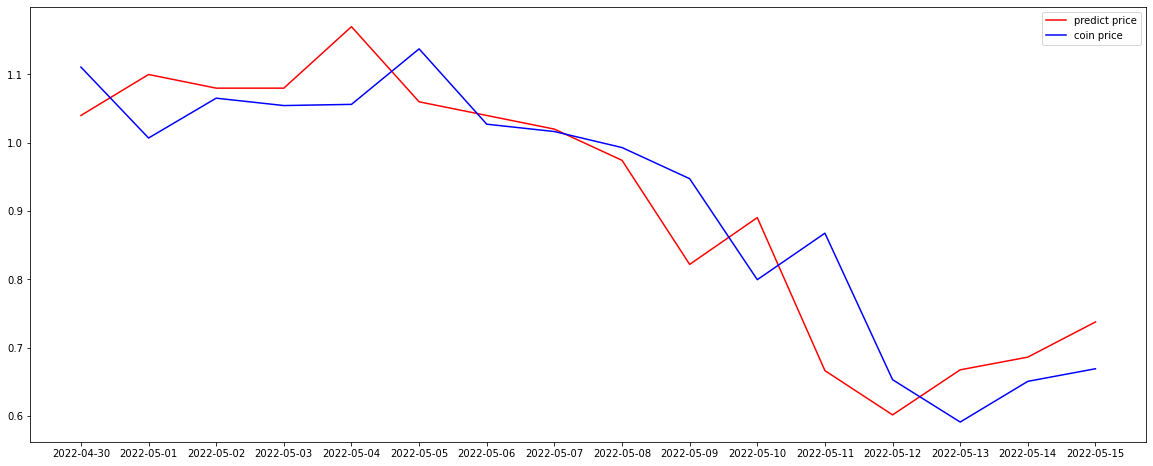

In [12]:
gfmodel.visualize()

In [13]:
result.to_csv('POLYGON_result_data')
gfmodel.save_csv('POLYGON_Visulize_data.csv')